In [1]:
! pip install easyocr
! pip install imutils

     |████████████████████████████████| 70.8 MB 1.1 MB/s            
     |████████████████████████████████| 21.0 MB 651 kB/s            
     |████████████████████████████████| 750.6 MB 14 kB/s             
     |████████████████████████████████| 47.6 MB 916 kB/s            
You should consider upgrading via the '/home/nichita_novitchii/anaconda3/bin/python -m pip install --upgrade pip' command.
  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=ec5c6100b4c44dde94a4c041ea8a07e3b957e1cc2438275bd9d809ef7db0495e
  Stored in directory: /home/nichita_novitchii/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/home/nichita_novitchii/anaconda3/bin/python -m pip install --upgrade pip' command.


In [39]:
import cv2 
import matplotlib.pyplot as plt
import imutils
import numpy as np
import easyocr

def platenumberRecogntion(image_name):
    
    
    img = cv2.imread(image_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    
    bfilter = cv2.bilateralFilter(img, 10, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
    
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break
            
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    
    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    result = [z[-2].upper() for z in result]
    
    return result

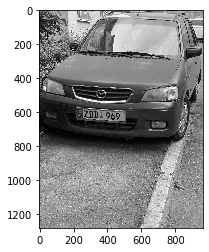

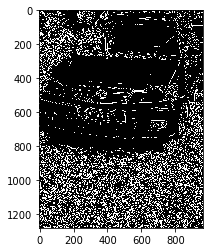

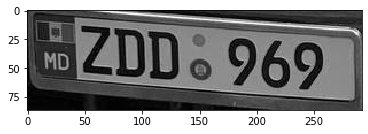

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['MD', 'ZDD', '962']

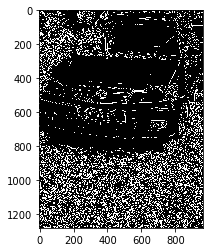

In [46]:
platenumberRecogntion('image2.jpeg')